In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tf_utils import load_dataset

In [4]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

#### Display the first 25 images from the training set and display the class name below each image. 

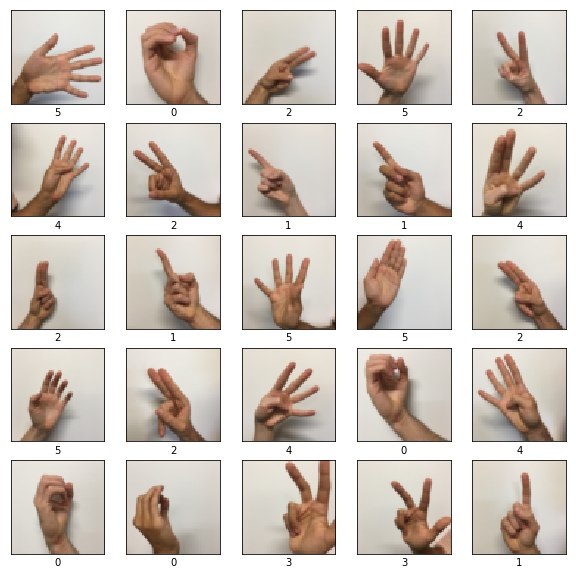

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i])
    plt.xlabel(np.squeeze(Y_train_orig[:, i]))

In [6]:
print ("number of training examples = " + str(X_train_orig.shape[1]))
print ("number of test examples = " + str(X_test_orig.shape[1]))
print ("X_train shape: " + str(X_train_orig.shape))
print ("Y_train shape: " + str(Y_train_orig.shape))
print ("X_test shape: " + str(X_test_orig.shape))
print ("Y_test shape: " + str(Y_test_orig.shape))

number of training examples = 64
number of test examples = 64
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1, 1080)
X_test shape: (120, 64, 64, 3)
Y_test shape: (1, 120)


### Preprocess the data

In [7]:
train_images = X_train_orig / 255.0
train_labels = Y_train_orig.flatten()
test_images = X_test_orig / 255.0
test_labels = Y_test_orig.flatten()

### Build the model
#### also adding l2 regularization to the model

In [91]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(25, activation=tf.nn.relu, 
                       kernel_initializer = tf.contrib.layers.xavier_initializer(seed = 1), 
                       kernel_regularizer = tf.keras.regularizers.l2(l=0.01),
                       bias_initializer = tf.zeros_initializer()),
    keras.layers.Dense(12, activation=tf.nn.relu, 
                       kernel_initializer = tf.contrib.layers.xavier_initializer(seed = 1), 
                       kernel_regularizer = tf.keras.regularizers.l2(l=0.01),
                       bias_initializer = tf.zeros_initializer()),
    keras.layers.Dense(6, activation=tf.nn.softmax,
                       kernel_initializer = tf.contrib.layers.xavier_initializer(seed = 1), 
                       kernel_regularizer = tf.keras.regularizers.l2(l=0.01),
                       bias_initializer = tf.zeros_initializer())
])

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 25)                307225    
_________________________________________________________________
dense_28 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 78        
Total params: 307,615
Trainable params: 307,615
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### Display training progress by printing loss and accuracy for every 100 epochs

In [19]:
class Print_Loss_Acc(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('Epoch: {0} - loss: {1} - acc: {2}'.format(epoch, logs['loss'], logs['acc']))
    

In [94]:
history = model.fit(train_images, train_labels, batch_size = 64,
                    verbose = 0, epochs=1000, callbacks=[Print_Loss_Acc()])

Epoch: 0 - loss: 2.552054497047707 - acc: 0.18611111177338494
Epoch: 100 - loss: 1.1848714660715174 - acc: 0.7212962954132646
Epoch: 200 - loss: 0.8696818983113325 - acc: 0.8333333328918174
Epoch: 300 - loss: 0.7417378271067584 - acc: 0.8694444431198968
Epoch: 400 - loss: 0.6712723555388274 - acc: 0.8999999986754523
Epoch: 500 - loss: 0.6069470732300369 - acc: 0.9398148161393625
Epoch: 600 - loss: 0.5808123345728273 - acc: 0.9407407394161931
Epoch: 700 - loss: 0.5380540975817928 - acc: 0.9629629638459948
Epoch: 800 - loss: 0.5188252338656673 - acc: 0.9685185194015503
Epoch: 900 - loss: 0.4977019164297316 - acc: 0.9777777777777777


In [25]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.legend()

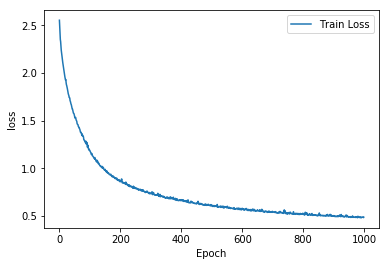

In [95]:
plot_history(history)

In [96]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose = 1)
print('Train accuracy:', train_acc)

1080/1080 [==============================] - 1s 712us/step
Train accuracy: 0.9824074074074074


In [97]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuaracy:', test_acc)

120/120 [==============================] - 0s 516us/step
Test accuaracy: 0.8333333333333334


Output predicted by the model 5


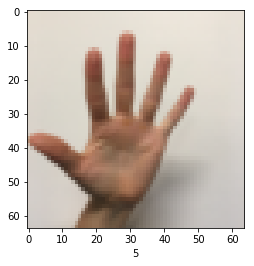

In [98]:
i = 3
plt.imshow(X_train_orig[i])
plt.xlabel(np.squeeze(Y_train_orig[:, i]))

print('Output predicted by the model {0}'.format(np.argmax(model.predict(test_images[i][np.newaxis,:]))))